In [ ]:
import requests

url_dict = {
    'shakespeare.txt': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/miniprojects/project3/data/shakespeare.txt',
    'spenser.txt': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/miniprojects/project3/data/spenser.txt',
    'syllable_dict.txt' : 'https://caltech-cs155.s3.us-east-2.amazonaws.com/miniprojects/project3/data/Syllable_dictionary.txt',
    'about_syllable_dict.docx' : 'https://caltech-cs155.s3.us-east-2.amazonaws.com/miniprojects/project3/data/syllable_dict_explanation.docx'
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

download_file('shakespeare.txt')
download_file('spenser.txt')
download_file('syllable_dict.txt')
download_file('about_syllable_dict.docx')

Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete


In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 10.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import re
import random
from itertools import islice
from hmmlearn import hmm

def read_text(f):
    with open(f, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    return lines

text_data = read_text('haikus.txt')

def process_text(t):
    t = re.sub(r'[^a-zA-Z\s]', '', t.lower())
    words = t.split()
    if len(words) > 1:
        return list(zip(words, islice(words, 1, None)))
    return []

bigrams = []
for line in text_data:
    bigrams.extend(process_text(line))

if not bigrams:
    raise ValueError("No bigrams found. Check the input text format.")

vocab_list = list(set(bigrams))

bigram_to_idx = {}
idx_to_bigram = {}
for i, pair in enumerate(vocab_list):
    bigram_to_idx[pair] = i
    idx_to_bigram[i] = pair

sequence_data = []
for pair in bigrams:
    if pair in bigram_to_idx:
        sequence_data.append([bigram_to_idx[pair]])
sequence_data = np.array(sequence_data)

if sequence_data.size == 0:
    raise ValueError("No valid sequences found for training. Check tokenization.")

hmm_model = hmm.MultinomialHMM(n_components=5, n_iter=50, random_state=42)
hmm_model.fit(sequence_data)
hmm_model.emissionprob_ = np.random.rand(hmm_model.n_components, len(vocab_list))
hmm_model.emissionprob_ /= hmm_model.emissionprob_.sum(axis=1, keepdims=True)

def load_syllables(file_name):
    syllable_map = {}
    with open(file_name, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    for line in lines:
        parts = line.strip().split()
        word = parts[0]
        syllables = []
        for num in parts[1:]:
            if num.isdigit():
                syllables.append(int(num))
        if not syllables:
            syllables.append(1)
        syllable_map[word] = syllables
    return syllable_map

syllable_dict = load_syllables('syllable_dict.txt')

def generate_haiku():
    haiku_structure = [5, 7, 5]
    haiku_lines = []
    for syllables_needed in haiku_structure:
        line = []
        syllable_count = 0
        max_attempts = 100
        attempts = 0
        hidden_state = np.random.choice(5)

        while syllable_count < syllables_needed and attempts < max_attempts:
            attempts += 1
            word_idx = np.random.choice(len(vocab_list), p=hmm_model.emissionprob_[hidden_state])
            bigram = idx_to_bigram[word_idx]
            word = bigram[0]

            if word in syllable_dict:
                word_syllables = max(syllable_dict[word])
                if syllable_count + word_syllables <= syllables_needed:
                    syllable_count += word_syllables
                    line.append(word)

        haiku_lines.append(' '.join(line))

    return '\n'.join(haiku_lines)

print("\nGenerated Haiku:")
print(generate_haiku())

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340



Generated Haiku:
a without within
far there how in by is the
old no silence then
[[6.26001363e-04 4.28684930e-03 5.01387098e-03 ... 2.52594688e-03
  9.24994641e-06 1.88919626e-03]
 [2.86307601e-03 3.81822394e-03 4.42470302e-03 ... 5.08666467e-03
  2.34630196e-04 1.08541683e-03]
 [3.80115291e-03 2.30875145e-03 4.47575973e-03 ... 1.71981976e-03
  2.87328342e-03 2.29707309e-03]
 [1.99360365e-03 2.54530013e-04 2.75337288e-03 ... 1.02177923e-03
  2.44103545e-03 2.81446831e-03]
 [4.67419053e-03 2.05466262e-03 4.77706735e-04 ... 3.70443652e-03
  2.46692984e-03 1.03978892e-03]]


In [ ]:
import numpy as np
import re
import random
from itertools import islice
from hmmlearn import hmm

def read_text(f):
    with open(f, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    return lines

text_data = read_text('haikus.txt')

def process_text(t):
    t = re.sub(r'[^a-zA-Z\s]', '', t.lower())
    words = t.split()
    if len(words) > 1:
        return list(zip(words, islice(words, 1, None)))
    return []

bigrams = []
for line in text_data:
    bigrams.extend(process_text(line))

if not bigrams:
    raise ValueError("No bigrams found. Check the input text format.")

vocab_list = list(set(bigrams))

bigram_to_idx = {}
idx_to_bigram = {}
for i, pair in enumerate(vocab_list):
    bigram_to_idx[pair] = i
    idx_to_bigram[i] = pair

sequence_data = []
for pair in bigrams:
    if pair in bigram_to_idx:
        sequence_data.append([bigram_to_idx[pair]])
sequence_data = np.array(sequence_data)

if sequence_data.size == 0:
    raise ValueError("No valid sequences found for training. Check tokenization.")

hmm_model = hmm.MultinomialHMM(n_components=5, n_iter=80, random_state=42)
hmm_model.fit(sequence_data)
hmm_model.emissionprob_ = np.random.rand(hmm_model.n_components, len(vocab_list))
hmm_model.emissionprob_ /= hmm_model.emissionprob_.sum(axis=1, keepdims=True)

def load_syllables(file_name):
    syllable_map = {}
    with open(file_name, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    for line in lines:
        parts = line.strip().split()
        word = parts[0]
        syllables = [int(num) for num in parts[1:] if num.isdigit()]
        syllable_map[word] = syllables if syllables else [1]  # Default 1 syllable if missing
    return syllable_map

syllable_dict = load_syllables('syllable_dict.txt')

def generate_haiku():
    haiku_structure = [5, 7, 5]
    haiku_lines = []
    for syllables_needed in haiku_structure:
        line = []
        syllable_count = 0
        max_attempts = 100
        attempts = 0
        hidden_state = np.random.choice(5)

        while syllable_count < syllables_needed and attempts < max_attempts:
            attempts += 1
            word_idx = np.random.choice(len(vocab_list), p=hmm_model.emissionprob_[hidden_state])
            bigram = idx_to_bigram[word_idx]
            word = bigram[0]

            if word in syllable_dict:
                word_syllables = syllable_dict[word][0]  # Picks the first available syllable count
                if syllable_count + word_syllables <= syllables_needed:
                    syllable_count += word_syllables
                    line.append(word)

        haiku_lines.append(' '.join(line))

    return '\n'.join(haiku_lines)

print("\nGenerated Haiku:")
print(generate_haiku())

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340



Generated Haiku:
a night too leaves and
of world summer with the no
in a first can like
[[4.00776766e-03 3.15820113e-03 3.77070662e-03 ... 3.82737362e-03
  1.80462322e-04 4.80333756e-03]
 [3.82164292e-04 4.61914584e-03 4.35710321e-03 ... 2.12155468e-03
  3.94940168e-03 1.11454406e-03]
 [4.25758162e-03 3.38839822e-03 1.08740645e-03 ... 9.42520043e-04
  4.32957210e-03 4.25770182e-03]
 [3.51973545e-03 1.88799306e-03 2.84550451e-03 ... 3.17675375e-03
  3.76272694e-04 3.61513063e-03]
 [8.30656210e-04 4.80371428e-03 1.21933508e-03 ... 3.15015206e-05
  2.97644028e-03 2.79200789e-03]]


Haiku HMM 


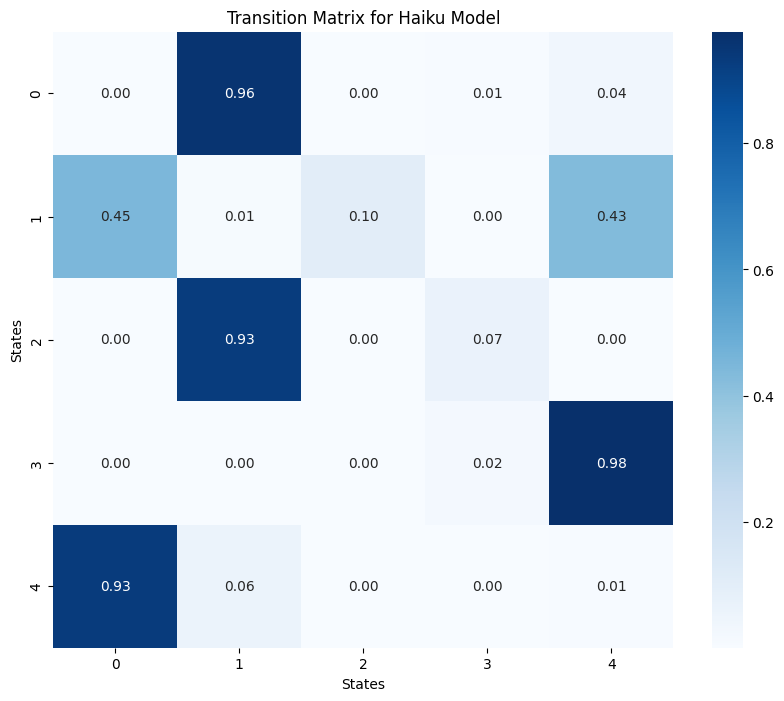

Text(220.72222222222223, 0.5, 'Hidden States')

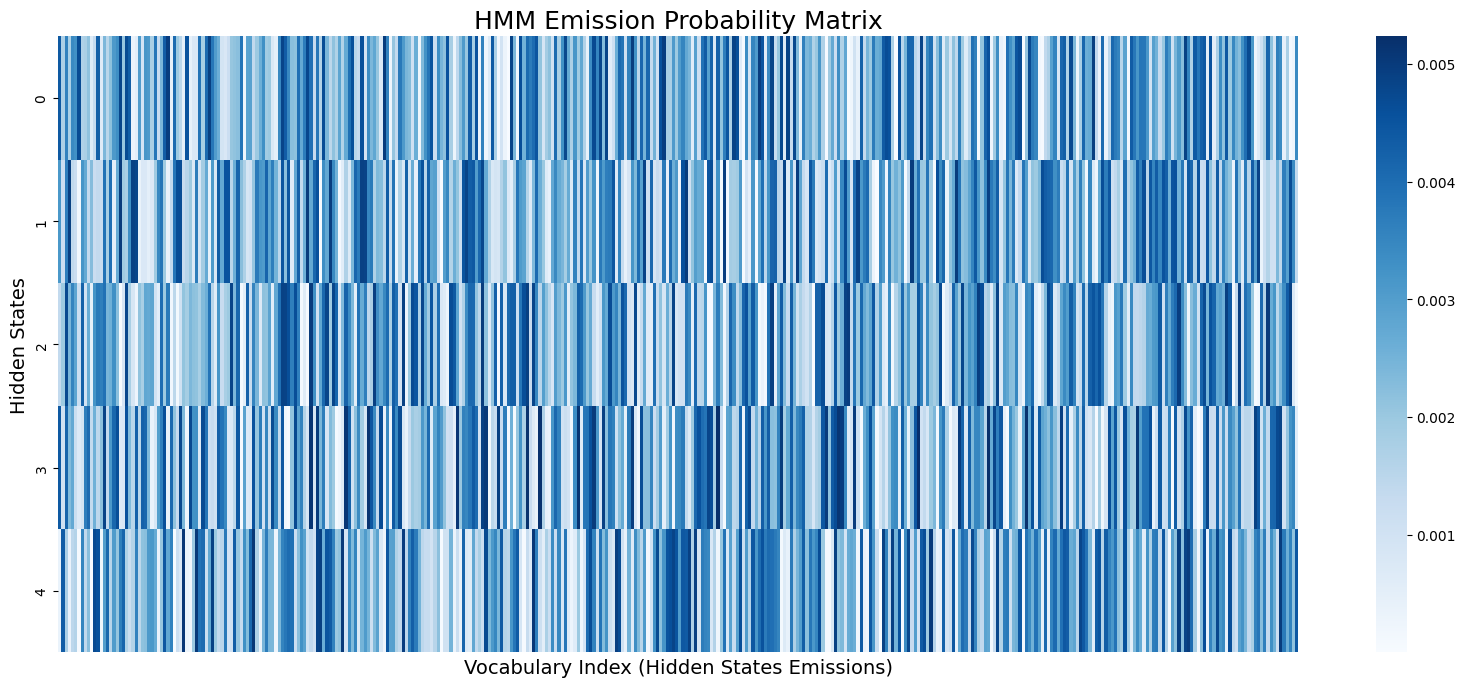

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_matrix(matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap="Blues")
    plt.title(title)
    plt.xlabel("States")
    plt.ylabel("States")
    plt.show()

print("Haiku HMM ")

plot_matrix(hmm_model.transmat_, "Transition Matrix for Haiku Model")

plt.figure(figsize=(20, 8))
sns.heatmap(hmm_model.emissionprob_, cmap="Blues", cbar=True, xticklabels=False, yticklabels=True)

plt.title("HMM Emission Probability Matrix", fontsize=18)
plt.xlabel("Vocabulary Index (Hidden States Emissions)", fontsize=14)
plt.ylabel("Hidden States", fontsize=14)